97.53271484375
90.12998046875
77.79560546875001
60.52373046875002
38.314355468750016


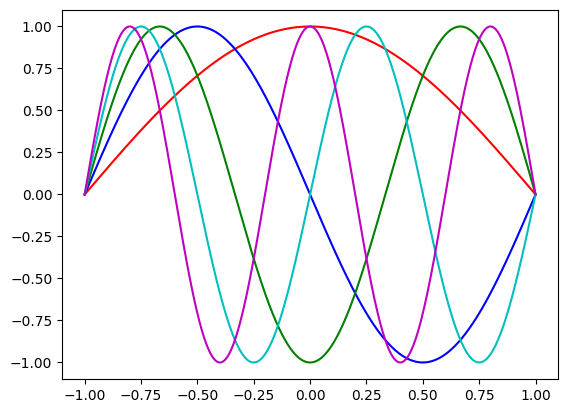

In [2]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import RK45
import matplotlib.pyplot as plt

def shoot2(x, dummy, n0, beta):
    return [x[1], (beta - n0) * x[0]]

tol = 1e-4  # define a tolerance level 
col = ['r', 'b', 'g', 'c', 'm', 'k']  # eigenfunc colors
n0 = 100; A = 1; x0 = [0, A]; xp = [-1, 1] 
xshoot =  np.linspace(xp[0], xp[1],1000)

beta_start = n0  # beginning value of beta
for modes in range(1, 6):  # begin mode loop
    beta = beta_start  # initial value of eigenvalue beta
    dbeta = n0 / 100  # default step size in beta
    for _ in range(1000):  # begin convergence loop for beta
        y = odeint(shoot2, x0, xshoot, args=(n0,beta)) 
       # y = RK45(shoot2, xp[0], x0, xp[1], args=(n0,beta)) 

        if abs(y[-1, 0] - 0) < tol:  # check for convergence
            print(beta)  # write out eigenvalue
            break  # get out of convergence loop

        if (-1) ** (modes + 1) * y[-1, 0] > 0:
            beta -= dbeta
        else:
            beta += dbeta / 2
            dbeta /= 2

    beta_start = beta - 0.1  # after finding eigenvalue, pick new start
    norm = np.trapz(y[:, 0] * y[:, 0], xshoot)  # calculate the normalization
    plt.plot(xshoot, y[:, 0] / np.sqrt(norm), col[modes - 1])  # plot modes

plt.show()  # end mode loop

C:\Users\jackr\AppData\Local\Temp\ipykernel_7420\3818889857.py:17: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  y = odeint(shoot_hw, x0, xshoot, args=(eps0,))


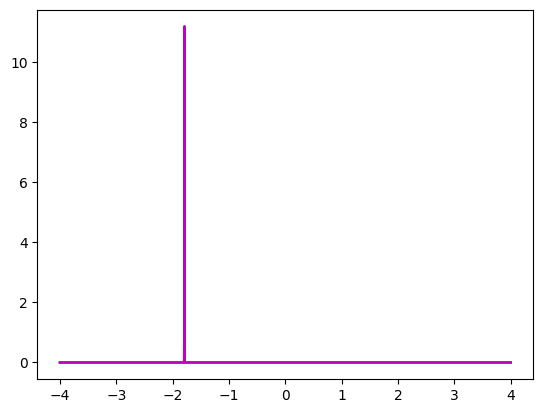

In [14]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import RK45
import matplotlib.pyplot as plt

def shoot_hw(x, dummy, eps0):
    return [x[2], x[1], (x[0]**2 - eps0) * x[0]]

tol = 1e-4  # define a tolerance level 
col = ['r', 'b', 'g', 'c', 'm', 'k']  # eigenfunc colors
eps0 = 10; A = 1; B = 1; x0 = [0, A, B]; xp = [-4, 4] 
xshoot =  np.linspace(xp[0], xp[1],1000)

for modes in range(1, 6):  # begin mode loop
    deps0 = eps0 / 100  # default step size in eps0
    for _ in range(1000):  # begin convergence loop for beta
        y = odeint(shoot_hw, x0, xshoot, args=(eps0,)) 
       # y = RK45(shoot2, xp[0], x0, xp[1], args=(n0,beta)) 

        if abs(y[-1, 0] - 0) < tol:  # check for convergence
            print(eps0)  # write out eigenvalue
            break  # get out of convergence loop

        if (-1) ** (modes + 1) * y[-1, 0] > 0:
            eps0 -= eps0
        else:
            eps0 += deps0 / 2
            deps0 /= 2

    beta_start = beta - 0.1  # after finding eigenvalue, pick new start
    norm = np.trapz(y[:, 0] * y[:, 0], xshoot)  # calculate the normalization
    plt.plot(xshoot, y[:, 0] / np.sqrt(norm), col[modes - 1])  # plot modes

plt.show()  # end mode loop

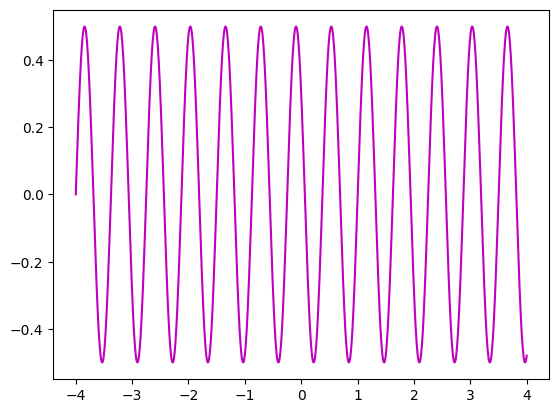

In [13]:
def shoot_hw(x, dummy, eps0):
    return [x[2], x[1], (x[0]**2 - eps0) * x[0]]

tol = 1e-4  # define a tolerance level 
col = ['r', 'b', 'g', 'c', 'm', 'k']  # eigenfunc colors
eps0 = 100; A = 1; B = 1; x0 = [0, A, B]; xp = [-4, 4] 
xshoot =  np.linspace(xp[0], xp[1],1000)
deps0 = eps0 / 100  # default step size in eps0
for _ in range(1000):  # begin convergence loop for beta
    y = odeint(shoot_hw, x0, xshoot, args=(eps0,)) 
   # y = RK45(shoot2, xp[0], x0, xp[1], args=(n0,beta)) 
    if abs(y[-1, 0] - 0) < tol:  # check for convergence
        print(eps0)  # write out eigenvalue
        break  # get out of convergence loop
    if (-1) ** (modes + 1) * y[-1, 0] > 0:
        eps0 -= eps0
    else:
        eps0 += deps0 / 2
        deps0 /= 2
beta_start = beta - 0.1  # after finding eigenvalue, pick new start
norm = np.trapz(y[:, 0] * y[:, 0], xshoot)  # calculate the normalization
plt.plot(xshoot, y[:, 0] / np.sqrt(norm), col[modes - 1])  # plot modes

plt.show()  # end mode loop